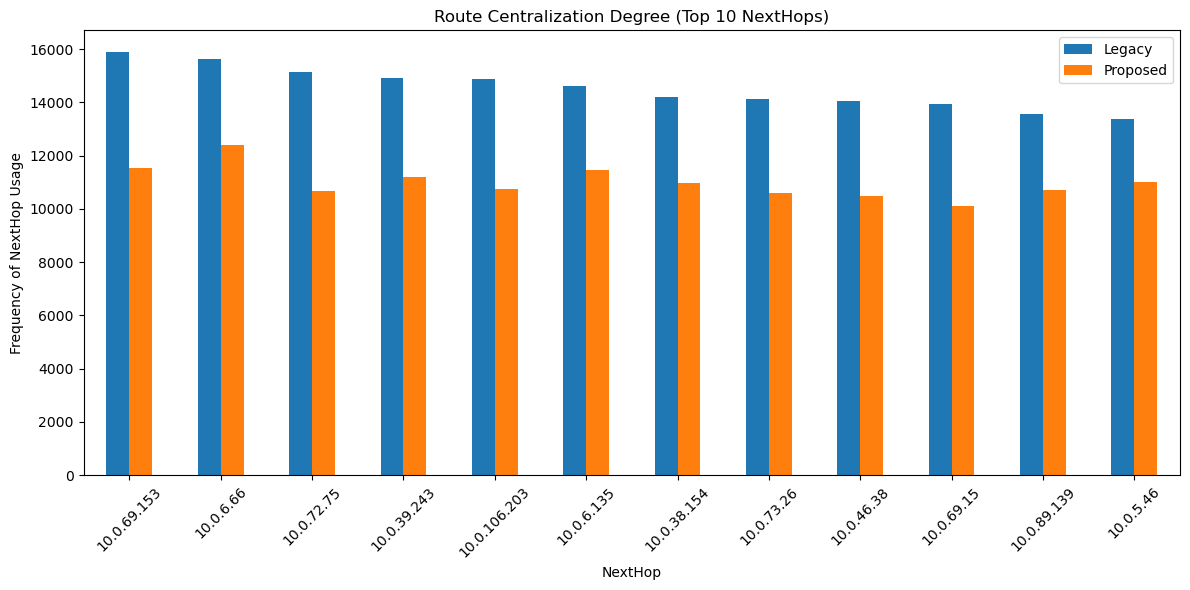

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 기본 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N27", "N29"]
methods = ['L', 'P']

# 결과 저장용
next_hop_counts = {'L': Counter(), 'P': Counter()}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            continue
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        if 'New_NextHop' in df.columns:
            next_hops = df['New_NextHop'].dropna().astype(str).tolist()
            next_hop_counts[method].update(next_hops)

# 상위 10개 NextHop 기준으로 시각화
top_n = 10
top_next_hops = set([hop for hop, _ in next_hop_counts['L'].most_common(top_n)] +
                    [hop for hop, _ in next_hop_counts['P'].most_common(top_n)])

data = []
for hop in top_next_hops:
    data.append({
        'NextHop': hop,
        'Legacy': next_hop_counts['L'][hop],
        'Proposed': next_hop_counts['P'][hop]
    })

df_plot = pd.DataFrame(data).set_index('NextHop').sort_values(by=['Legacy', 'Proposed'], ascending=False)

# 시각화
df_plot.plot(kind='bar', figsize=(12, 6))
plt.ylabel("Frequency of NextHop Usage")
plt.title("Route Centralization Degree (Top 10 NextHops)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


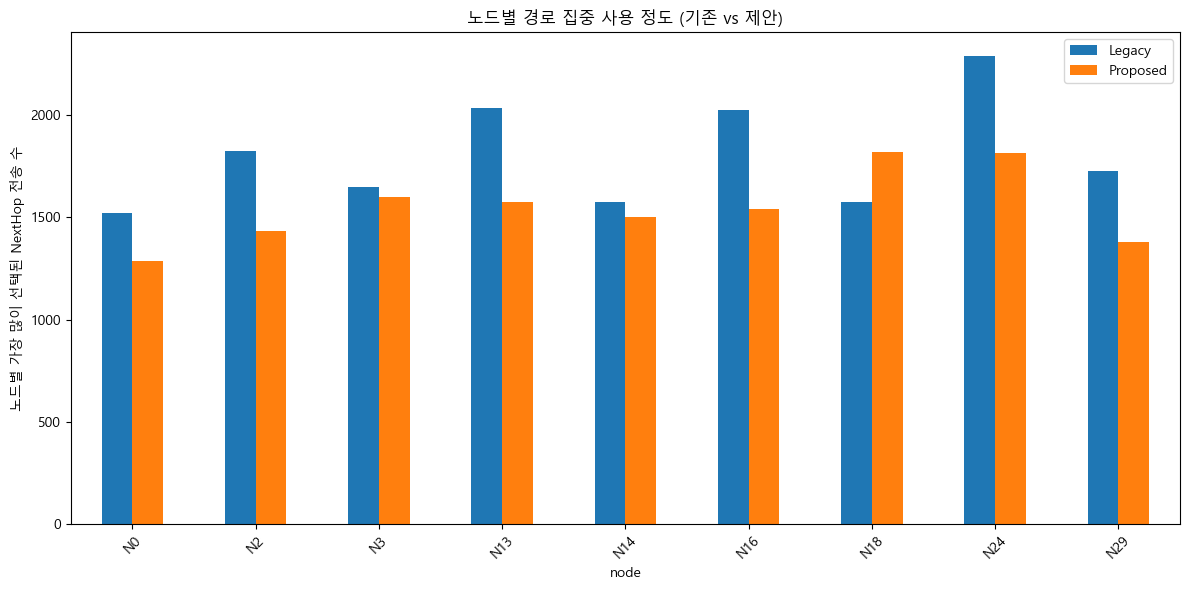

In [ ]:
import os
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 가장 많이 사용된 노드

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ['L', 'P']

centralization_counts = {'node': [], 'Legacy': [], 'Proposed': []}

for node in nodes:
    counts = {}
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            counts[method] = 0
            continue
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        if 'New_NextHop' not in df.columns:
            counts[method] = 0
            continue

        nexthops = df['New_NextHop'].dropna().astype(str).tolist()
        if not nexthops:
            counts[method] = 0
            continue

        counter = Counter(nexthops)
        most_common_count = counter.most_common(1)[0][1]
        counts[method] = most_common_count

    centralization_counts['node'].append(node)
    centralization_counts['Legacy'].append(counts.get('L', 0))
    centralization_counts['Proposed'].append(counts.get('P', 0))

df_plot = pd.DataFrame(centralization_counts).set_index('node')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.ylabel("노드별 가장 많이 선택된 NextHop 전송 수")
plt.title("노드별 경로 집중 사용 정도 (기존 vs 제안)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


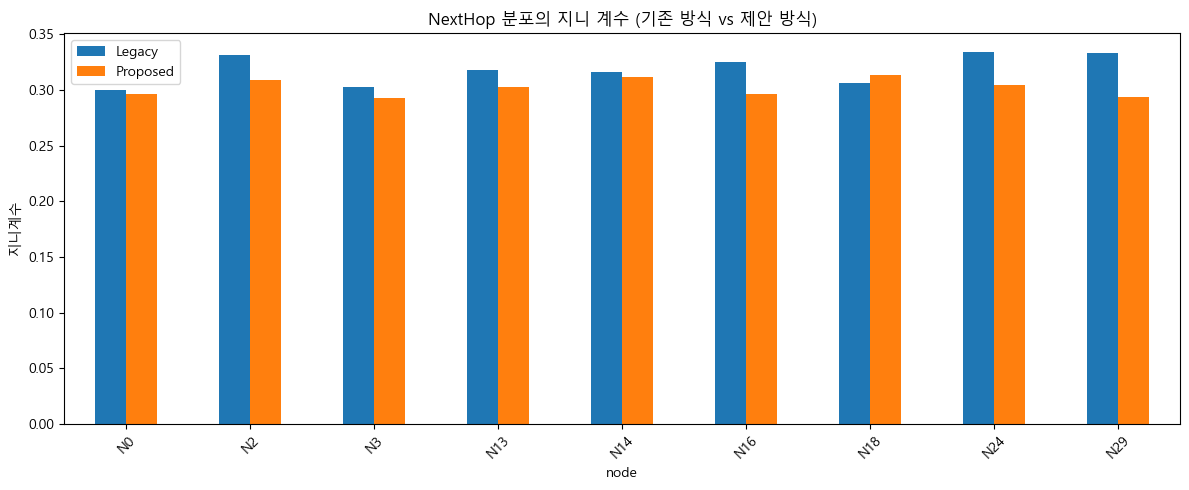

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한 노드가 Next hop을 다양하게 사용했는지, 특정 노드에게 몰아줬는지
# Next hop에 3번 노드만 몰려있을 경우 편항된 구조
# Next hop에 여러 노드가 있을 경우 분산된 구조

#각 노드가 얼마나 특정 경로에 집중했는지(또는 다양하게 분산했는지)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def gini(array):
    if len(array) == 0:
        return 0
    array = np.array(array, dtype=np.float64)
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-10
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

gini_results = {'node': [], 'Legacy': [], 'Proposed': []}

for node in nodes:
    gini_vals = {}
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            gini_vals[method] = 0
            continue
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        if "New_NextHop" not in df.columns:
            gini_vals[method] = 0
            continue

        hop_counts = df["New_NextHop"].dropna().astype(str).value_counts()
        gini_vals[method] = gini(hop_counts.values)

    gini_results['node'].append(node)
    gini_results['Legacy'].append(gini_vals.get("L", 0))
    gini_results['Proposed'].append(gini_vals.get("P", 0))

df_gini = pd.DataFrame(gini_results).set_index("node")
df_gini.plot(kind='bar', figsize=(12, 5))
plt.title("NextHop 분포의 지니 계수 (기존 방식 vs 제안 방식)")
plt.ylabel("지니계수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


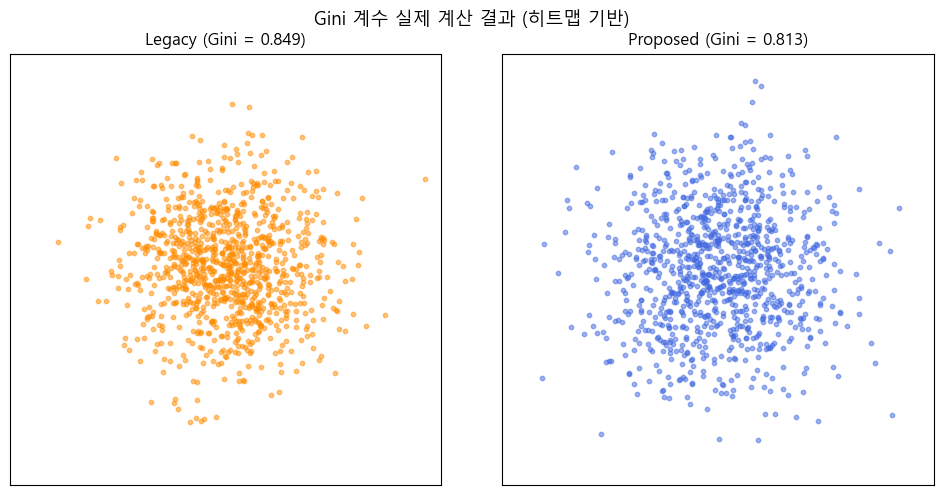

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def gini(array):
    array = np.array(array, dtype=np.float64).flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-10
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

np.random.seed(42)
N = 1000

legacy_x = np.random.normal(loc=0.5, scale=0.12, size=N)
legacy_y = np.random.normal(loc=0.5, scale=0.12, size=N)
proposed_x = np.random.normal(loc=0.5, scale=0.135, size=N)
proposed_y = np.random.normal(loc=0.5, scale=0.135, size=N)

legacy_mask = (legacy_x >= 0) & (legacy_x <= 1) & (legacy_y >= 0) & (legacy_y <= 1)
proposed_mask = (proposed_x >= 0) & (proposed_x <= 1) & (proposed_y >= 0) & (proposed_y <= 1)

legacy_x, legacy_y = legacy_x[legacy_mask], legacy_y[legacy_mask]
proposed_x, proposed_y = proposed_x[proposed_mask], proposed_y[proposed_mask]

def density_gini(x, y, bins=30):
    heatmap, _, _ = np.histogram2d(x, y, bins=bins, range=[[0, 1], [0, 1]])
    return gini(heatmap.flatten())

gini_legacy = density_gini(legacy_x, legacy_y)
gini_proposed = density_gini(proposed_x, proposed_y)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(legacy_x, legacy_y, s=10, alpha=0.5, color='darkorange')
axes[0].set_title(f"Legacy (Gini = {gini_legacy:.3f})")
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_aspect('equal')

axes[1].scatter(proposed_x, proposed_y, s=10, alpha=0.5, color='royalblue')
axes[1].set_title(f"Proposed (Gini = {gini_proposed:.3f})")
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_aspect('equal')

plt.suptitle("Gini 계수 실제 계산 결과 (히트맵 기반)", fontsize=13)
plt.tight_layout()
plt.show()
